In [1]:
import pandas as pd 
# from sodapy import Socrata  # API for data

In [2]:
# Use the API to get raw data 
# client = Socrata("data.cincinnati-oh.gov", None)
# crash_raw = pd.DataFrame.from_records(
#                 client.get('rvmt-pkmq', limit=1000000)
#             )

# Using the API is faster than using pd.read_json

In [3]:
# Get the raw data 
raw = pd.read_csv("Traffic_Crash_Reports__CPD_.csv")

C:\Users\Ern\AppData\Local\Temp\ipykernel_13660\1786469094.py:2: DtypeWarning: Columns (8,27) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv("Traffic_Crash_Reports__CPD_.csv")


# Raw Data Overview

In [4]:
raw.shape

(328558, 28)

In [5]:
raw.columns

Index(['ADDRESS_X', 'LATITUDE_X', 'LONGITUDE_X', 'AGE',
       'COMMUNITY_COUNCIL_NEIGHBORHOOD', 'CPD_NEIGHBORHOOD',
       'SNA_NEIGHBORHOOD', 'CRASHDATE', 'CRASHLOCATION', 'CRASHSEVERITY',
       'CRASHSEVERITYID', 'DATECRASHREPORTED', 'DAYOFWEEK', 'GENDER',
       'INJURIES', 'INSTANCEID', 'LIGHTCONDITIONSPRIMARY', 'LOCALREPORTNO',
       'MANNEROFCRASH', 'ROADCONDITIONSPRIMARY', 'ROADCONTOUR', 'ROADSURFACE',
       'ROADCLASS', 'ROADCLASSDESC', 'UNITTYPE', 'TYPEOFPERSON', 'WEATHER',
       'ZIP'],
      dtype='object')

In [6]:
raw.iloc[:,0:10].head()  # What does the table look like?

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGE,COMMUNITY_COUNCIL_NEIGHBORHOOD,CPD_NEIGHBORHOOD,SNA_NEIGHBORHOOD,CRASHDATE,CRASHLOCATION,CRASHSEVERITY
0,S I75 AT 2-7 MM,39.125153,-84.537191,NaN,WEST END,QUEENSGATE,QUEENSGATE,03/30/2023 12:57:00 AM,NaN,5 - PROPERTY DAMAGE ONLY
1,2XX E LIBERTY ST,39.113294,-84.513194,32.0,MOUNT AUBURN,MOUNT AUBURN,OVER-THE-RHINE,03/29/2023 11:45:00 PM,NaN,5 - PROPERTY DAMAGE ONLY
2,2XX E LIBERTY ST,39.112334,-84.513164,24.0,MOUNT AUBURN,MOUNT AUBURN,OVER-THE-RHINE,03/29/2023 11:45:00 PM,NaN,5 - PROPERTY DAMAGE ONLY
3,6XX CENTRAL AV,39.101560,-84.519050,45.0,WEST END,QUEENSGATE,WEST END,03/29/2023 10:29:00 PM,NaN,5 - PROPERTY DAMAGE ONLY
4,6XX CENTRAL AV,39.102170,-84.519620,38.0,WEST END,QUEENSGATE,WEST END,03/29/2023 10:29:00 PM,NaN,5 - PROPERTY DAMAGE ONLY


In [7]:
raw.dtypes  # Columns and data types

ADDRESS_X                          object
LATITUDE_X                        float64
LONGITUDE_X                       float64
AGE                               float64
COMMUNITY_COUNCIL_NEIGHBORHOOD     object
CPD_NEIGHBORHOOD                   object
SNA_NEIGHBORHOOD                   object
CRASHDATE                          object
CRASHLOCATION                      object
CRASHSEVERITY                      object
CRASHSEVERITYID                   float64
DATECRASHREPORTED                  object
DAYOFWEEK                          object
GENDER                             object
INJURIES                           object
INSTANCEID                         object
LIGHTCONDITIONSPRIMARY             object
LOCALREPORTNO                       int64
MANNEROFCRASH                      object
ROADCONDITIONSPRIMARY              object
ROADCONTOUR                        object
ROADSURFACE                        object
ROADCLASS                         float64
ROADCLASSDESC                     

# Reformatting Data

We note that there are several columns that can be split up into the "quantitative measure" and description. These columns are: 
- `CRASHSEVERITY`
- `GENDER`
- `INJURIES`
- `LIGHTCONDITIONSPRIMARY`
- `MANNEROFCRASH`
- `ROADCONDITIONSPRIMARY`
- `ROADSURFACE`
- `UNITTYPE`
- `TYPEOFPERSON`
- `WEATHER`

In addition, converting the data types of some of the fields would be useful for analysis. These fields are:
- `CRASHDATE` `object` to datetime
- `LOCALREPORTNO` `int64` to `str`
- `DATECRASHREPORED` `object` to datetime
- `CRASHSEVERITYID` `float64` to `str`

Finally, we notice that `ZIP` is string but has decimal points. We will need to remove those.

In [8]:
data = raw 

##  Converting data types

In [9]:
# Strings to dates
data.loc[:, 'CRASHDATE'] = pd.to_datetime(data.CRASHDATE)
data.loc[:, 'DATECRASHREPORTED'] = pd.to_datetime(data.DATECRASHREPORTED)

# Numbers to strings
data.loc[:, 'LOCALREPORTNO'] = data.LOCALREPORTNO.apply(str )
data.loc[:, 'CRASHSEVERITYID'] = data.CRASHSEVERITYID.apply(str)

C:\Users\Ern\AppData\Local\Temp\ipykernel_13660\1858008429.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'CRASHDATE'] = pd.to_datetime(data.CRASHDATE)
C:\Users\Ern\AppData\Local\Temp\ipykernel_13660\1858008429.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'DATECRASHREPORTED'] = pd.to_datetime(data.DATECRASHREPORTED)


In [10]:
# Stripping the trailing zeros from ZIP 
data.loc[:,'ZIP'] = data.ZIP.astype(str)
data.loc[:,'ZIP'] = data.ZIP.str[:5]

## Splitting fields

In [11]:
# Separate scores from descriptions
data[['CRASHSEVERITY','CRASHSEVERITYDESCR']] = data.CRASHSEVERITY.str.split(pat=' - ', expand=True)
data.CRASHSEVERITY = data.CRASHSEVERITY.astype('Int64')

data[['ROADCONTOUR','ROADCONTOURDESCR']] = data.ROADCONTOUR.str.split(pat=' - ', expand=True)
data.ROADCONTOUR = data.ROADCONTOUR.astype('Int64')

data[['MANNEROFCRASH', 'MANNEROFCRASHDESCR']] = data.MANNEROFCRASH.str.split(pat=' - ', expand=True)
data.MANNEROFCRASH = data.MANNEROFCRASH.astype('Int64')

data[['TYPEOFPERSON','TYPEOFPERSONDESCR']] = data.TYPEOFPERSON.str.split(pat=' - ', expand=True)

In [50]:
# Crash location doesn't seem to have any real hierarchy-- remove the score 
data.CRASHLOCATION = data.CRASHLOCATION.str.replace(r'\d\d - ', '')

C:\Users\Ern\AppData\Local\Temp\ipykernel_13660\1176445860.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.CRASHLOCATION = data.CRASHLOCATION.str.replace(r'\d\d - ', '')


Some fields are more complicated than a simple string split. These fields are:
- `GENDER`: Some values have a code and a description, others just a description. 
- `INJURIES`: There seem to be two different measurement systems, one ascending in severity and one descending in severity.
- `LIGHTCONDITIONSPRIMARY`: There are multiple values, which can conflict, per score.
- `ROADCONDITIONSPRIMARY`: There are multiple values per score.
- `ROADSURFACE`: There are multiple values per score and the same value mapped to differing scores.
- `UNITTYPE`: There are multiple values per score.
- `WEATHER`: There are multiple values per score.

Let us examine these fields in greater detail.

### Gender

In [12]:
data.GENDER.unique()

array([nan, 'F - FEMALE', 'M - MALE', 'U - UNKNOWN', 'FEMALE', 'MALE'],
      dtype=object)

The space the description strings take up is negligible, so let us remove the codes from the field to make the values consistent.

In [13]:
data['GENDER'] = data.GENDER.str.replace('F - ', '')
data['GENDER'] = data.GENDER.str.replace('M - ', '')
data['GENDER'] = data.GENDER.str.replace('U - ', '')
data.GENDER.unique()

array([nan, 'FEMALE', 'MALE', 'UNKNOWN'], dtype=object)

### Injuries

In [14]:
data.INJURIES.unique()

array([nan, '5 - NO APPARENTY INJURY', '3 - SUSPECTED MINOR INJURY',
       '4 - POSSIBLE INJURY', '2 - SUSPECTED SERIOUS INJURY', '1 - FATAL',
       '1 - NO INJURY / NONE REPORTED', '2 - POSSIBLE',
       '3 - NON-INCAPACITATING', '4 - INCAPACITATING', '5 - FATAL'],
      dtype=object)

It is clear that there is some hierarchy of injuries. Are these scales differing by system? By time? (Perhaps the entry system was changed at some point)


For now, let us split the field.

In [15]:
data[['INJURIES', 'INJURIESDESCR']] = data.INJURIES.str.split(pat=' - ', expand=True)
data.INJURIES = data.INJURIES.astype('Int64')

In [16]:
# Fix the typo in `5 - NO APPARENTY INJURY`
data.loc[data['INJURIESDESCR'] == 'NO APPARENTY INJURY', 'INJURIESDESCR'] = 'NO APPARENT INJURY'

### Light conditions

In [17]:
data.LIGHTCONDITIONSPRIMARY.unique()

array(['3 - DARK - LIGHTED ROADWAY', '2 - DUSK', '1 - DAYLIGHT',
       '5 - DARK – UNKNOWN ROADWAY LIGHTING', '9 - UNKNOWN', '2 - DAWN',
       '4 - DARK – ROADWAY NOT LIGHTED', '9 - OTHER', '8 - OTHER',
       '4 - DARK - LIGHTED ROADWAY',
       '6 - DARK – UNKNOWN ROADWAY LIGHTING',
       '5 - DARK – ROADWAY NOT LIGHTED', '3 - DUSK',
       '5 - DARK – ROADWAY NOT LIGHTIED', nan], dtype=object)

Similarly to `INJURIES`, it is clear there is a hierarchy from light to dark, but there are multiple scales. Let us split the field.

In [18]:
data['LIGHTCONDITIONS'] = data.LIGHTCONDITIONSPRIMARY.str[0]
data.LIGHTCONDITIONS = data.LIGHTCONDITIONS.astype('Int64')
data['LIGHTCONDITIONSDESCR'] = data.LIGHTCONDITIONSPRIMARY.str[4:]
data.drop(columns='LIGHTCONDITIONSPRIMARY', inplace=True)

### Road conditions

In [19]:
data.ROADCONDITIONSPRIMARY.unique()

array(['01 - DRY', '09 - UNKNOWN', '02 - WET', '03 - SNOW',
       '05 - SAND, MUD, DIRT, OIL, GRAVEL', '04 - ICE', '07 - SLUSH',
       '09 - OTHER', '06 - WATER (STANDING, MOVING)', '99 - UNKNOWN',
       '10 - OTHER', nan], dtype=object)

In [20]:
data['ROADCONDITIONS'] = data.ROADCONDITIONSPRIMARY.str[0:2]
data.ROADCONDITIONS = data.ROADCONDITIONS.astype('Int64')
data['ROADCONDITIONSDESCR'] = data.ROADCONDITIONSPRIMARY.str[5:]
data.drop(columns='ROADCONDITIONSPRIMARY', inplace=True)

### Road surface

In [21]:
data.ROADSURFACE.unique()

array(['2 - BLACKTOP, BITUMINOUS, ASPHALT', '1 - CONCRETE',
       '4 - SLAG, GRAVEL, STONE', '3 - BRICK/BLOCK', '9 - UNKNOWN',
       '9 - OTHER', '5 - DIRT', '6 - OTHER', nan], dtype=object)

The inconsistency is with a score of 9, where the value can be either "Unknown" or "Other". For now, we will simply split the score from the description.

In [22]:
data[['ROADSURFACE', 'ROADSURFACEDESCR']] = data.ROADSURFACE.str.split(pat=' - ', expand=True)
data.ROADSURFACE = data.ROADSURFACE.astype('Int64')

### Unit type

In [23]:
data.UNITTYPE.unique

<bound method Series.unique of 0                                NaN
1          19 - BUS (16+ PASSENGERS)
2                 01 - PASSENGER CAR
3                 01 - PASSENGER CAR
4         03 - SPORT UTILITY VEHICLE
                     ...            
328553    06 - SPORT UTILITY VEHICLE
328554                 03 - MID SIZE
328555                 03 - MID SIZE
328556                 03 - MID SIZE
328557                 03 - MID SIZE
Name: UNITTYPE, Length: 328558, dtype: object>

There doesn't seem to be any real hierarchy, so let us remove the scores from unit type.

In [24]:
data.UNITTYPE = data.UNITTYPE.str.replace(r'\d\d - ', '')

C:\Users\Ern\AppData\Local\Temp\ipykernel_13660\3808989830.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.UNITTYPE = data.UNITTYPE.str.replace(r'\d\d - ', '')


# Crash Data Overview

In [25]:
data.shape

(328558, 36)

In [26]:
data.dtypes

ADDRESS_X                                 object
LATITUDE_X                               float64
LONGITUDE_X                              float64
AGE                                      float64
COMMUNITY_COUNCIL_NEIGHBORHOOD            object
CPD_NEIGHBORHOOD                          object
SNA_NEIGHBORHOOD                          object
CRASHDATE                         datetime64[ns]
CRASHLOCATION                             object
CRASHSEVERITY                              Int64
CRASHSEVERITYID                           object
DATECRASHREPORTED                 datetime64[ns]
DAYOFWEEK                                 object
GENDER                                    object
INJURIES                                   Int64
INSTANCEID                                object
LOCALREPORTNO                             object
MANNEROFCRASH                              Int64
ROADCONTOUR                                Int64
ROADSURFACE                                Int64
ROADCLASS           

In [27]:
data.describe()

,LATITUDE_X,LONGITUDE_X,AGE,CRASHSEVERITY,INJURIES,MANNEROFCRASH,ROADCONTOUR,ROADSURFACE,ROADCLASS,LIGHTCONDITIONS,ROADCONDITIONS
count,3.285290e+05,3.285270e+05,287961.000000,328551.0,328250.0,328537.0,328537.0,328537.0,203133.000000,328537.0,328537.0
mean,2.633354e+03,-1.199095e+04,37.465070,3.481904,2.663829,4.262655,1.469451,1.853091,2.825745,1.79539,1.551956
std,1.469781e+06,6.819152e+06,16.585971,1.080332,1.837182,2.441715,0.857321,0.408198,1.484126,1.336644,4.998746
min,-8.449023e+01,-3.908552e+09,0.000000,1.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0
25%,3.911740e+01,-8.454953e+01,24.000000,3.0,1.0,2.0,1.0,2.0,2.000000,1.0,1.0
50%,3.913663e+01,-8.451502e+01,34.000000,3.0,1.0,6.0,1.0,2.0,2.000000,1.0,1.0
75%,3.916096e+01,-8.448473e+01,49.000000,5.0,5.0,6.0,2.0,2.0,4.000000,3.0,1.0
max,8.424329e+08,1.000000e-03,933.000000,5.0,5.0,9.0,9.0,9.0,10.000000,9.0,99.0


One remark is that the score value fields which use 9(9) as Unknown/Other skew the distribution. It may make sense to revisit these later.

In [28]:
data.iloc[0:5, 0:10]

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGE,COMMUNITY_COUNCIL_NEIGHBORHOOD,CPD_NEIGHBORHOOD,SNA_NEIGHBORHOOD,CRASHDATE,CRASHLOCATION,CRASHSEVERITY
0,S I75 AT 2-7 MM,39.125153,-84.537191,NaN,WEST END,QUEENSGATE,QUEENSGATE,2023-03-30 00:57:00,NaN,5
1,2XX E LIBERTY ST,39.113294,-84.513194,32.0,MOUNT AUBURN,MOUNT AUBURN,OVER-THE-RHINE,2023-03-29 23:45:00,NaN,5
2,2XX E LIBERTY ST,39.112334,-84.513164,24.0,MOUNT AUBURN,MOUNT AUBURN,OVER-THE-RHINE,2023-03-29 23:45:00,NaN,5
3,6XX CENTRAL AV,39.101560,-84.519050,45.0,WEST END,QUEENSGATE,WEST END,2023-03-29 22:29:00,NaN,5
4,6XX CENTRAL AV,39.102170,-84.519620,38.0,WEST END,QUEENSGATE,WEST END,2023-03-29 22:29:00,NaN,5


In [29]:
data.iloc[0:5, 10:20]

,CRASHSEVERITYID,DATECRASHREPORTED,DAYOFWEEK,GENDER,INJURIES,INSTANCEID,LOCALREPORTNO,MANNEROFCRASH,ROADCONTOUR,ROADSURFACE
0,201905.0,2023-03-30 00:58:00,THU,NaN,<NA>,AD46E8B0-1008-4FC0-BF47-1CFE6FBC30CC,235003518,7,1,2
1,201905.0,2023-03-29 23:47:00,WED,FEMALE,5,C14AF618-B333-4A43-8667-3D4182E493E7,235003517,6,2,2
2,201905.0,2023-03-29 23:47:00,WED,FEMALE,5,C14AF618-B333-4A43-8667-3D4182E493E7,235003517,6,2,2
3,201905.0,2023-03-29 22:32:00,WED,FEMALE,5,D0E6E797-8123-4DED-B4CD-745C640DFDAB,235003516,2,1,2
4,201905.0,2023-03-29 22:32:00,WED,MALE,5,D0E6E797-8123-4DED-B4CD-745C640DFDAB,235003516,2,1,2


In [30]:
data.iloc[0:5, 20:30]

,ROADCLASS,ROADCLASSDESC,UNITTYPE,TYPEOFPERSON,WEATHER,ZIP,CRASHSEVERITYDESCR,ROADCONTOURDESCR,MANNEROFCRASHDESCR,TYPEOFPERSONDESCR
0,NaN,NaN,NaN,NaN,1 - CLEAR,45223,PROPERTY DAMAGE ONLY,STRAIGHT LEVEL,"SIDESWIPE, SAME DIRECTION",NaN
1,NaN,NaN,BUS (16+ PASSENGERS),D,1 - CLEAR,45202,PROPERTY DAMAGE ONLY,STRAIGHT GRADE,ANGLE,DRIVER
2,NaN,NaN,PASSENGER CAR,O,1 - CLEAR,45202,PROPERTY DAMAGE ONLY,STRAIGHT GRADE,ANGLE,OCCUPANT
3,6.0,Ramps,PASSENGER CAR,D,1 - CLEAR,45203,PROPERTY DAMAGE ONLY,STRAIGHT LEVEL,REAR-END,DRIVER
4,6.0,Ramps,SPORT UTILITY VEHICLE,D,1 - CLEAR,45203,PROPERTY DAMAGE ONLY,STRAIGHT LEVEL,REAR-END,DRIVER


In [31]:
data.iloc[0:5, 30:40]

,INJURIESDESCR,LIGHTCONDITIONS,LIGHTCONDITIONSDESCR,ROADCONDITIONS,ROADCONDITIONSDESCR,ROADSURFACEDESCR
0,NaN,3,DARK - LIGHTED ROADWAY,1,DRY,"BLACKTOP, BITUMINOUS, ASPHALT"
1,NO APPARENT INJURY,3,DARK - LIGHTED ROADWAY,1,DRY,"BLACKTOP, BITUMINOUS, ASPHALT"
2,NO APPARENT INJURY,3,DARK - LIGHTED ROADWAY,1,DRY,"BLACKTOP, BITUMINOUS, ASPHALT"
3,NO APPARENT INJURY,3,DARK - LIGHTED ROADWAY,1,DRY,"BLACKTOP, BITUMINOUS, ASPHALT"
4,NO APPARENT INJURY,3,DARK - LIGHTED ROADWAY,1,DRY,"BLACKTOP, BITUMINOUS, ASPHALT"


## Validating the Data

In [36]:
data.columns

Index(['ADDRESS_X', 'LATITUDE_X', 'LONGITUDE_X', 'AGE',
       'COMMUNITY_COUNCIL_NEIGHBORHOOD', 'CPD_NEIGHBORHOOD',
       'SNA_NEIGHBORHOOD', 'CRASHDATE', 'CRASHLOCATION', 'CRASHSEVERITY',
       'CRASHSEVERITYID', 'DATECRASHREPORTED', 'DAYOFWEEK', 'GENDER',
       'INJURIES', 'INSTANCEID', 'LOCALREPORTNO', 'MANNEROFCRASH',
       'ROADCONTOUR', 'ROADSURFACE', 'ROADCLASS', 'ROADCLASSDESC', 'UNITTYPE',
       'TYPEOFPERSON', 'WEATHER', 'ZIP', 'CRASHSEVERITYDESCR',
       'ROADCONTOURDESCR', 'MANNEROFCRASHDESCR', 'TYPEOFPERSONDESCR',
       'INJURIESDESCR', 'LIGHTCONDITIONS', 'LIGHTCONDITIONSDESCR',
       'ROADCONDITIONS', 'ROADCONDITIONSDESCR', 'ROADSURFACEDESCR'],
      dtype='object')

In [61]:
data[data.isna()]

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGE,COMMUNITY_COUNCIL_NEIGHBORHOOD,CPD_NEIGHBORHOOD,SNA_NEIGHBORHOOD,CRASHDATE,CRASHLOCATION,CRASHSEVERITY,...,CRASHSEVERITYDESCR,ROADCONTOURDESCR,MANNEROFCRASHDESCR,TYPEOFPERSONDESCR,INJURIESDESCR,LIGHTCONDITIONS,LIGHTCONDITIONSDESCR,ROADCONDITIONS,ROADCONDITIONSDESCR,ROADSURFACEDESCR
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
328554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
328555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
328556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN


### `ADDRESS_X`

#### Completeness
Is the data incomplete? If so, can we keep the data?

In [51]:
data.ADDRESS_X.isna().sum()

20

In [60]:
data[data.ADDRESS_X.isna()].iloc[:, 0:10]

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGE,COMMUNITY_COUNCIL_NEIGHBORHOOD,CPD_NEIGHBORHOOD,SNA_NEIGHBORHOOD,CRASHDATE,CRASHLOCATION,CRASHSEVERITY
2197,NaN,39.161900,-84.521730,NaN,CLIFTON - SPRING GROVE VILLAGE,NORTHSIDE,CLIFTON,2023-02-26 06:00:20,NaN,5
2198,NaN,39.160950,-84.522840,27.0,CLIFTON - SPRING GROVE VILLAGE,NORTHSIDE,CLIFTON,2023-02-26 06:00:20,NaN,5
48613,NaN,39.106641,-84.585191,40.0,WEST PRICE HILL,WEST PRICE HILL,WEST PRICE HILL,2021-09-10 05:44:00,NaN,5
304917,NaN,39.116293,-84.487412,26.0,WALNUT HILLS,MOUNT ADAMS,WALNUT HILLS,2013-06-20 19:45:30,FOUR-WAY INTERSECTION,3
304918,NaN,39.115953,-84.487162,56.0,WALNUT HILLS,MOUNT ADAMS,WALNUT HILLS,2013-06-20 19:45:30,FOUR-WAY INTERSECTION,3
315809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,<NA>
315810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,5
315811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,5
315812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,3
315814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,<NA>


### 

How far does the data go back?

<AxesSubplot: xlabel='CRASHDATE'>

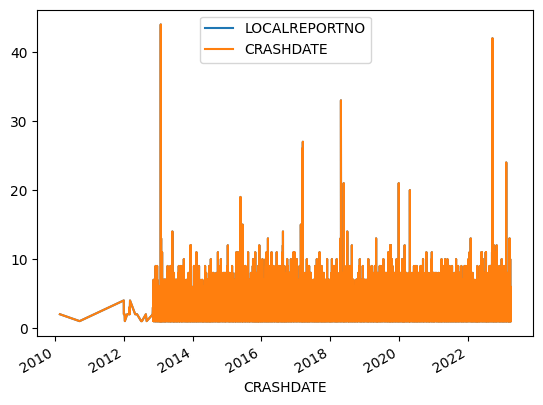

In [35]:
data[['LOCALREPORTNO', 'CRASHDATE']].groupby(data.CRASHDATE).count().plot()

### Primary Key
We want to identify the primary key for the data so that we can get accurate counts.

In [63]:
data.shape

(328558, 36)

In [62]:
data.INSTANCEID.nunique()

169706

In [64]:
data.LOCALREPORTNO.nunique()

169706

In [76]:
data[['LOCALREPORTNO', 'INSTANCEID']].groupby('LOCALREPORTNO').nunique().sort_values(by='INSTANCEID', ascending=True)

,INSTANCEID
LOCALREPORTNO,
125000004,1
195013057,1
195013058,1
195013059,1
195013060,1
...,...
165013330,1
165013331,1
165013332,1


`INSTANCEID` and `LOCALREPORTNO` are 1:1, so we only need to keep one of the columns. `LOCALREPORTNO` is shorter and appears to have an order, so we'll keep that.

In [80]:
data.drop(columns='INSTANCEID', inplace=True)

In [83]:
# Confirming that every record has a LOCALREPORNO
data[data.LOCALREPORTNO.isna()]

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGE,COMMUNITY_COUNCIL_NEIGHBORHOOD,CPD_NEIGHBORHOOD,SNA_NEIGHBORHOOD,CRASHDATE,CRASHLOCATION,CRASHSEVERITY,...,CRASHSEVERITYDESCR,ROADCONTOURDESCR,MANNEROFCRASHDESCR,TYPEOFPERSONDESCR,INJURIESDESCR,LIGHTCONDITIONS,LIGHTCONDITIONSDESCR,ROADCONDITIONS,ROADCONDITIONSDESCR,ROADSURFACEDESCR


We have confirmed that we can use `LOCALREPORTNO` to count crashes.

#### What does a crash look like?

In [82]:
# We want an example where there are multiple records for a report
data.sort_values(by = 'LOCALREPORTNO')

,ADDRESS_X,LATITUDE_X,LONGITUDE_X,AGE,COMMUNITY_COUNCIL_NEIGHBORHOOD,CPD_NEIGHBORHOOD,SNA_NEIGHBORHOOD,CRASHDATE,CRASHLOCATION,CRASHSEVERITY,...,CRASHSEVERITYDESCR,ROADCONTOURDESCR,MANNEROFCRASHDESCR,TYPEOFPERSONDESCR,INJURIESDESCR,LIGHTCONDITIONS,LIGHTCONDITIONSDESCR,ROADCONDITIONS,ROADCONDITIONSDESCR,ROADSURFACEDESCR
315793,15XX WESTERN HILLS VI,39.124355,-84.539618,20.0,QUEENSGATE,QUEENSGATE,QUEENSGATE,2012-11-05 12:40:00,NOT AN INTERSECTION,3,...,PROPERTY DAMAGE ONLY (PDO),STRAIGHT LEVEL,REAR-END,DRIVER,NO INJURY / NONE REPORTED,1,DAYLIGHT,1,DRY,CONCRETE
315792,15XX WESTERN HILLS VI,39.124725,-84.539188,24.0,QUEENSGATE,QUEENSGATE,QUEENSGATE,2012-11-05 12:40:00,NOT AN INTERSECTION,3,...,PROPERTY DAMAGE ONLY (PDO),STRAIGHT LEVEL,REAR-END,DRIVER,NO INJURY / NONE REPORTED,1,DAYLIGHT,1,DRY,CONCRETE
315788,6XX WALNUT ST,39.102780,-84.512175,33.0,DOWNTOWN,C. B. D. / RIVERFRONT,DOWNTOWN,2012-11-06 17:11:00,NOT AN INTERSECTION,3,...,PROPERTY DAMAGE ONLY (PDO),STRAIGHT LEVEL,"SIDESWIPE, SAME DIRECTION",DRIVER,NO INJURY / NONE REPORTED,4,DARK - LIGHTED ROADWAY,1,DRY,"BLACKTOP, BITUMINOUS, ASPHALT"
315787,6XX WALNUT ST,39.103390,-84.511755,56.0,DOWNTOWN,C. B. D. / RIVERFRONT,DOWNTOWN,2012-11-06 17:11:00,NOT AN INTERSECTION,3,...,PROPERTY DAMAGE ONLY (PDO),STRAIGHT LEVEL,"SIDESWIPE, SAME DIRECTION",DRIVER,NO INJURY / NONE REPORTED,4,DARK - LIGHTED ROADWAY,1,DRY,"BLACKTOP, BITUMINOUS, ASPHALT"
315786,S I71 AT 2-9 MM,39.119483,-84.499018,34.0,WALNUT HILLS,WALNUT HILLS,WALNUT HILLS,2012-11-06 17:11:41,NOT AN INTERSECTION,3,...,PROPERTY DAMAGE ONLY (PDO),STRAIGHT GRADE,REAR-END,DRIVER,NO INJURY / NONE REPORTED,3,DUSK,1,DRY,"BLACKTOP, BITUMINOUS, ASPHALT"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323845,6XX WILLIAM HOWARD TAFT,39.127412,-84.498763,NaN,AVONDALE,AVONDALE,AVONDALE,2012-12-05 05:00:00,NOT AN INTERSECTION,3,...,PROPERTY DAMAGE ONLY (PDO),STRAIGHT GRADE,"SIDESWIPE, SAME DIRECTION",DRIVER,NO INJURY / NONE REPORTED,4,DARK - LIGHTED ROADWAY,2,WET,"BLACKTOP, BITUMINOUS, ASPHALT"
323846,6XX WILLIAM HOWARD TAFT,39.128952,-84.498653,33.0,AVONDALE,AVONDALE,AVONDALE,2012-12-05 05:00:00,NOT AN INTERSECTION,3,...,PROPERTY DAMAGE ONLY (PDO),STRAIGHT GRADE,"SIDESWIPE, SAME DIRECTION",DRIVER,NO INJURY / NONE REPORTED,4,DARK - LIGHTED ROADWAY,2,WET,"BLACKTOP, BITUMINOUS, ASPHALT"
317220,N I71 AT 1-2 MM,39.099648,-84.507681,30.0,DOWNTOWN,C. B. D. / RIVERFRONT,DOWNTOWN,2013-02-15 19:02:00,NOT AN INTERSECTION,2,...,INJURY,STRAIGHT GRADE,REAR-END,DRIVER,NO INJURY / NONE REPORTED,4,DARK - LIGHTED ROADWAY,1,DRY,CONCRETE
317218,N I71 AT 1-2 MM,39.098638,-84.507381,49.0,DOWNTOWN,C. B. D. / RIVERFRONT,DOWNTOWN,2013-02-15 19:02:00,NOT AN INTERSECTION,2,...,INJURY,STRAIGHT GRADE,REAR-END,DRIVER,NO INJURY / NONE REPORTED,4,DARK - LIGHTED ROADWAY,1,DRY,CONCRETE


# Where are crashes happening most frequently?

In [84]:
data.columns

Index(['ADDRESS_X', 'LATITUDE_X', 'LONGITUDE_X', 'AGE',
       'COMMUNITY_COUNCIL_NEIGHBORHOOD', 'CPD_NEIGHBORHOOD',
       'SNA_NEIGHBORHOOD', 'CRASHDATE', 'CRASHLOCATION', 'CRASHSEVERITY',
       'CRASHSEVERITYID', 'DATECRASHREPORTED', 'DAYOFWEEK', 'GENDER',
       'INJURIES', 'LOCALREPORTNO', 'MANNEROFCRASH', 'ROADCONTOUR',
       'ROADSURFACE', 'ROADCLASS', 'ROADCLASSDESC', 'UNITTYPE', 'TYPEOFPERSON',
       'WEATHER', 'ZIP', 'CRASHSEVERITYDESCR', 'ROADCONTOURDESCR',
       'MANNEROFCRASHDESCR', 'TYPEOFPERSONDESCR', 'INJURIESDESCR',
       'LIGHTCONDITIONS', 'LIGHTCONDITIONSDESCR', 'ROADCONDITIONS',
       'ROADCONDITIONSDESCR', 'ROADSURFACEDESCR'],
      dtype='object')

In [90]:
data[['LOCALREPORTNO', 'ADDRESS_X']].groupby('ADDRESS_X').nunique()

,LOCALREPORTNO
ADDRESS_X,
% N I75 AT 2.7%,1
0-X W 562 AT I75,4
0-X W NORWOOD LATERAL,9
0.0X S I71 EX,1
0.X E NORWOOD LATERAL,7
...,...
XX WILLIAM HOWARD,2
XX WILLIAM HOWARD TAFT,19
XX WILLIAM HOWARD TAFT RD,156


<AxesSubplot: xlabel='ADDRESS_X'>

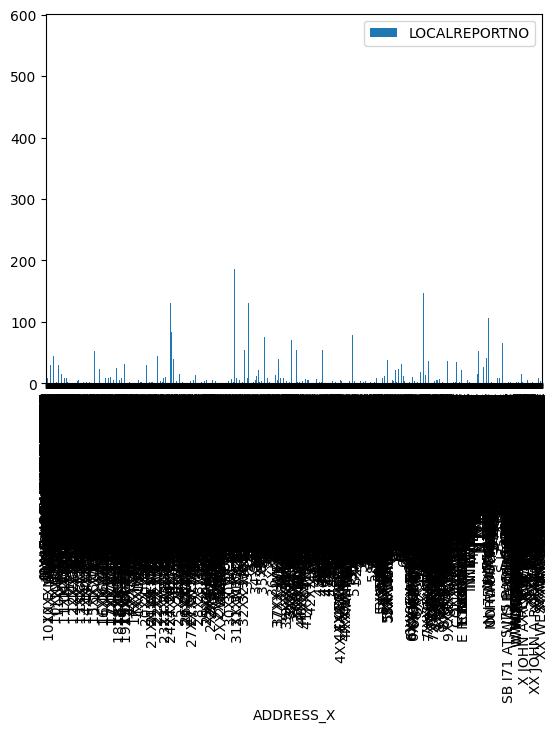

In [94]:
data[['LOCALREPORTNO', 'ADDRESS_X']].groupby('ADDRESS_X').nunique().plot(kind='bar')

It looks like there are very few locations where there are more than 100 traffic incidents.

In [95]:
data.ADDRESS_X.nunique()

13573

There are 13,573 unique addresses out of 328,558 records / 169,706 reports.

In [96]:
addr_incs = data[['ADDRESS_X', 'LOCALREPORTNO']]

In [97]:
addr_incs.groupby('ADDRESS_X').nunique().plot(kind='bar')

<AxesSubplot: xlabel='ADDRESS_X'>